In [1]:
import pandas as pd 
def load_train_data():
    data = pd.read_csv('Acoustic_train.csv')
    return data

def load_test_data():
    data = pd.read_csv('Acoustic_test_no_class.csv')
    return data

train_data = load_train_data()
test_data = load_test_data()

In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [3]:
# Preparing the data
X_train = train_data.drop(columns=["Index", "Class"])
y_train = train_data["Class"]

In [4]:
# Splitting into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
# Define individual models
nb_classifier = GaussianNB()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(probability=True, kernel='linear', random_state=42)

In [6]:
# Define the ensemble model using soft voting
voting_classifier = VotingClassifier(
    estimators=[
        ('naive_bayes', nb_classifier),
        ('random_forest', rf_classifier),
        ('svm', svm_classifier)
    ],
    voting='soft'  # Soft voting for averaging probabilities
)

In [7]:
# Train the ensemble model
voting_classifier.fit(X_train_split, y_train_split)

VotingClassifier(estimators=[('naive_bayes', GaussianNB()),
                             ('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=42))],
                 voting='soft')

In [8]:
# Make predictions on the validation set
y_val_pred = voting_classifier.predict(X_val)

In [9]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

print("Accuracy:", accuracy_score(y_val, y_val_pred))

Classification Report:
              precision    recall  f1-score   support

       angry       0.71      0.83      0.77        12
       happy       0.74      1.00      0.85        14
       relax       0.81      0.65      0.72        20
         sad       0.64      0.50      0.56        14

    accuracy                           0.73        60
   macro avg       0.72      0.75      0.72        60
weighted avg       0.73      0.73      0.72        60

Accuracy: 0.7333333333333333


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, class_labels, title="Confusion Matrix"):
    """
    Plots a confusion matrix using seaborn heatmap.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(title)
    plt.show()




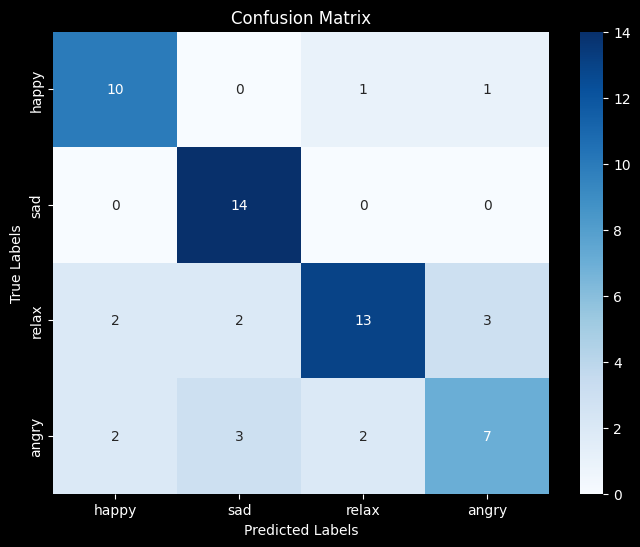

In [18]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, class_labels=['happy', 'sad', 'relax', 'angry'])